# Author-: Simran Sharma

# LGMVIP January 2022

# LetsGrowMore

# Task 3

# Prediction using Decision Tree  Algorithm :
# Level - INTERMEDIATE

Create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Iris_data = pd.read_csv(r'C:\Users\Simran\Downloads\Iris (2).csv')
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
Iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
Iris_data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Visualizing the dataset features 

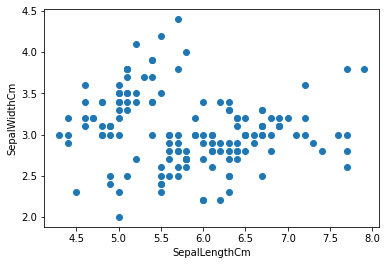

In [8]:
plt.scatter(Iris_data['SepalLengthCm'],Iris_data['SepalWidthCm'])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.show()

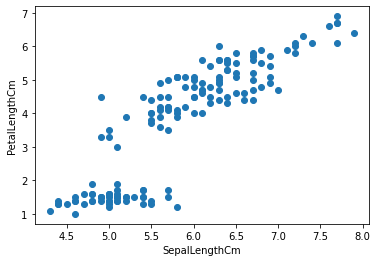

In [9]:
plt.scatter(Iris_data['SepalLengthCm'],Iris_data['PetalLengthCm'])
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.show()

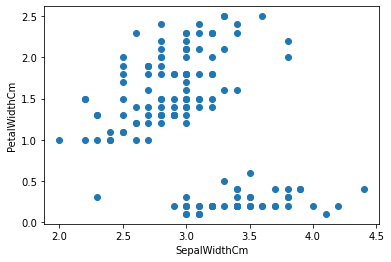

In [10]:
plt.scatter(Iris_data['SepalWidthCm'],Iris_data['PetalWidthCm'])
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
plt.show()

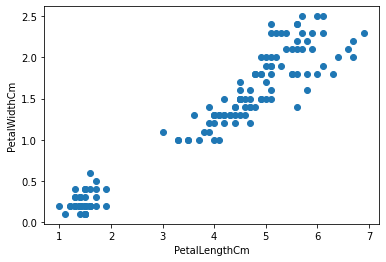

In [11]:
plt.scatter(Iris_data['PetalLengthCm'],Iris_data['PetalWidthCm'])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.show()

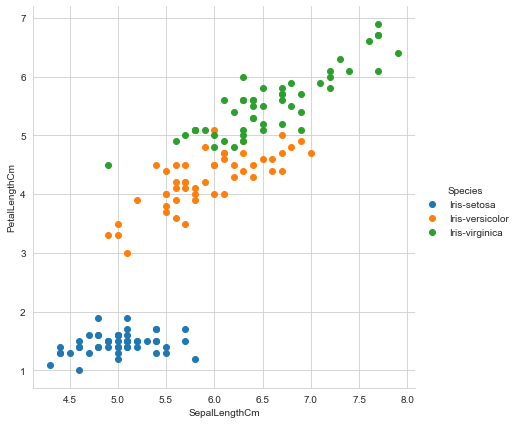

In [12]:
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(Iris_data, hue ="Species",
height = 6).map(plt.scatter,
'SepalLengthCm',
'PetalLengthCm').add_legend()


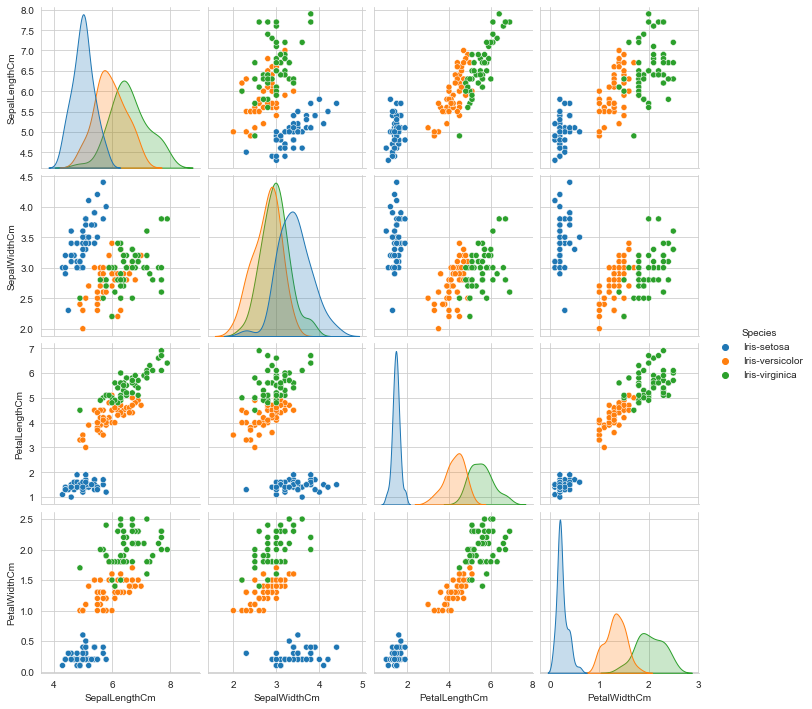

In [13]:
sns.pairplot(Iris_data.drop(['Id'],axis=1), hue='Species')
plt.show()

Droping Id column as it is of no use in classifing the class labels.

In [14]:
Iris_data.drop(['Id'],axis=1,inplace=True)

Checking distribution plot for each feature in dataset for each class label...
exploring distribution plot for all features

<Figure size 1080x576 with 0 Axes>

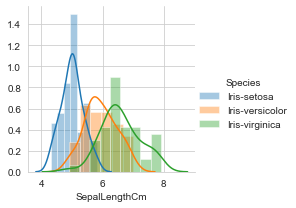

<Figure size 1080x576 with 0 Axes>

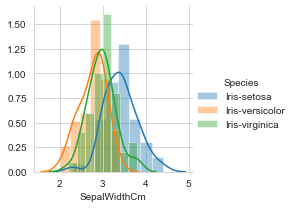

<Figure size 1080x576 with 0 Axes>

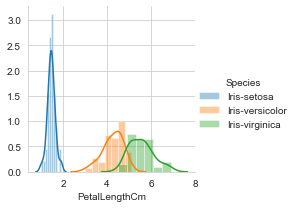

<Figure size 1080x576 with 0 Axes>

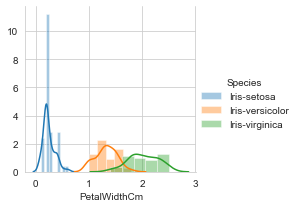

<Figure size 1080x576 with 0 Axes>

In [15]:
import warnings
warnings.filterwarnings('ignore')
for i in Iris_data.columns:
    plt.figure(figsize=[15,8])
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(Iris_data,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose.

In [17]:
X = Iris_data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = Iris_data['Species']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)


In [18]:
print(Xtrain.describe())
Xtrain.head()

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     105.000000    105.000000     105.000000    105.000000
mean        5.842857      3.004762       3.871429      1.238095
std         0.833304      0.414956       1.720002      0.744128
min         4.300000      2.000000       1.100000      0.100000
25%         5.100000      2.800000       1.700000      0.400000
50%         5.800000      3.000000       4.300000      1.300000
75%         6.400000      3.200000       5.100000      1.800000
max         7.700000      4.200000       6.700000      2.500000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [19]:
Ytrain.head(10)

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
96     Iris-versicolor
105     Iris-virginica
66     Iris-versicolor
0          Iris-setosa
122     Iris-virginica
Name: Species, dtype: object

In [20]:
clf = DecisionTreeClassifier()
X=clf.fit(Xtrain,Ytrain)

[Text(641.7, 946.77, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(542.9769230769231, 774.6299999999999, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(740.423076923077, 774.6299999999999, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(394.8923076923077, 602.49, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(197.44615384615386, 430.3499999999999, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(98.72307692307693, 258.21000000000004, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(296.1692307692308, 258.21000000000004, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(592.3384615384616, 430.3499999999999, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(493.61538461538464, 258.21000000000004, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(691.0615384615385, 258.21000000000004, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(592.3

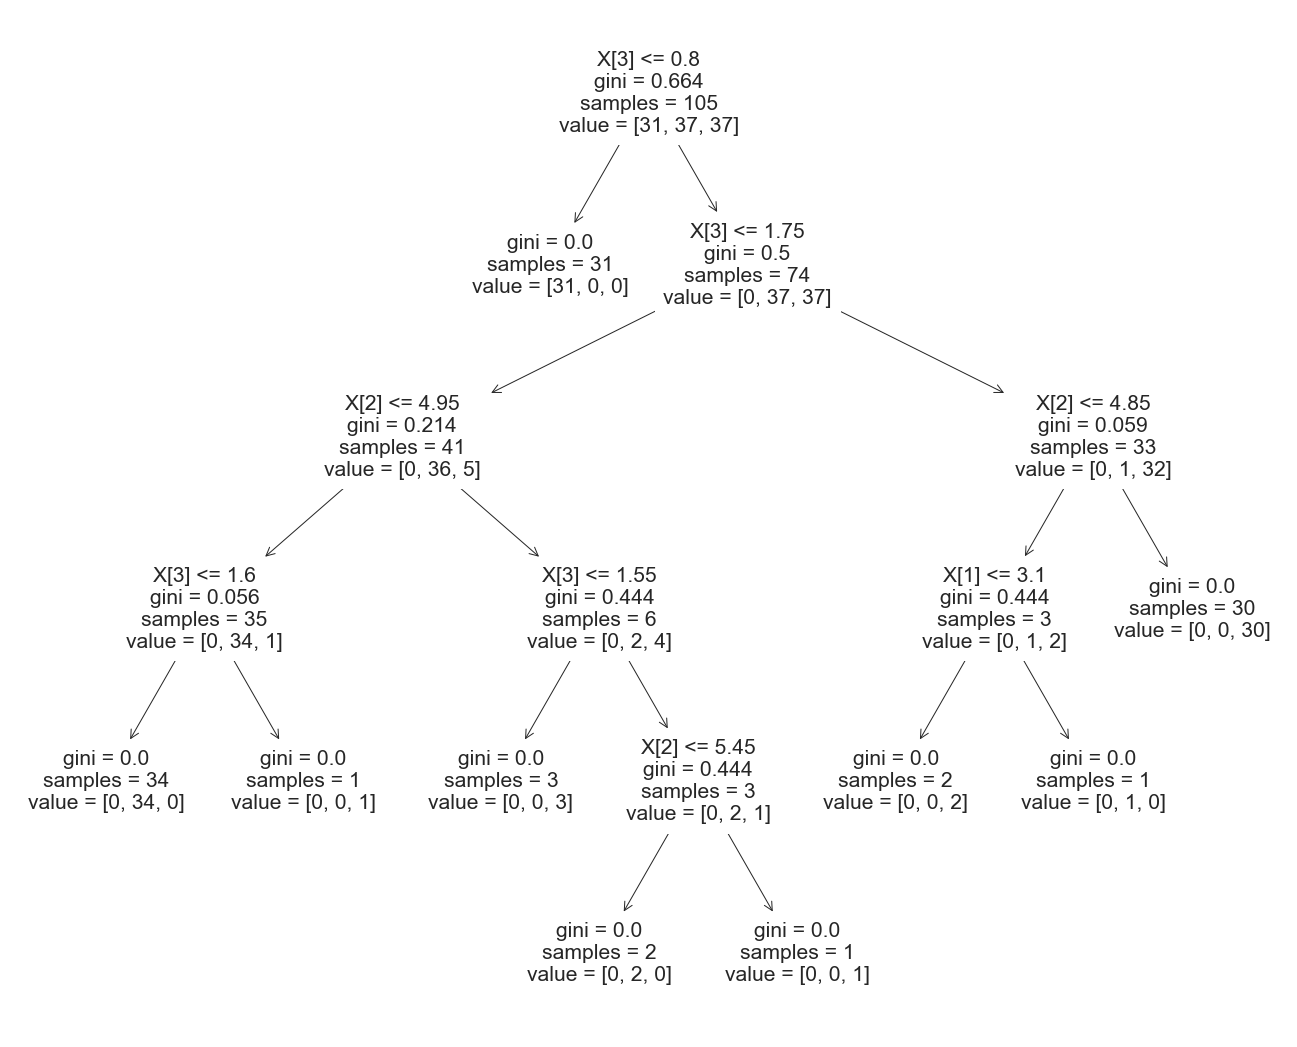

In [21]:
from sklearn import tree
plt.figure(figsize=[23, 19])
tree.plot_tree(X)

 Predict on Test Set 

In [22]:
y_pred = clf.predict(Xtest)
y_pred[:10]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [23]:
Ytest[:10]

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
Name: Species, dtype: object

Measure Accuracy of the Classifier & Accuracy Score

In [24]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = Ytrain, y_pred=clf.predict(Xtrain)))
print("Test data accuracy:",accuracy_score(y_true = Ytest, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 1.0


# __CONCLUSION__:
Successful Implementation of  the task is done.